In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras

In [57]:
def gen_time_series(batch_size, n_steps):
  freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0, 1, n_steps)
  series = 0.5 * np.sin((time-offset1)*(freq1*10+10))
  series += 0.2 * np.sin((time-offset2)*(freq2*20+20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)-0.5)
  return np.expand_dims(series, -1).astype(np.float32)

n_steps = 50
series = gen_time_series(10000, n_steps+1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_test, y_test = series[7000:, :n_steps], series[7000:, -1]

In [58]:
print(X_train.shape, y_train.shape)

# (sample 개수, step 개수, 기록값)  RNN에서 가장 중요한 값은 step 개수이다!

(7000, 50, 1) (7000, 1)


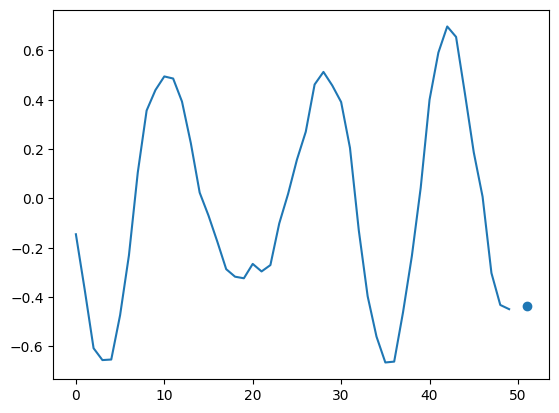

In [59]:
_, axe = plt.subplots()
axe.plot(X_train[0])
axe.scatter([51], y_train[0])

In [60]:
m1 = keras.Sequential([
  keras.layers.SimpleRNN(1, input_shape=(None, 1))   # RNN은 input_shape을 적는 방법이 다르다! 2번째값부터 적어야함!
])

m1.compile(optimizer='adam', loss='mse', metrics='mae') # mse : mean square error
m1.fit(X_train, y_train, epochs=10, verbose=1)
m1.evaluate(X_test, y_test)

Epoch 1/10
219/219 [==============================] - 1s 4ms/step - loss: 0.1746 - mae: 0.3624
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 0.1461 - mae: 0.3319
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 0.1199 - mae: 0.2999
Epoch 4/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0952 - mae: 0.2669
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0737 - mae: 0.2342
Epoch 6/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0552 - mae: 0.2022
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0400 - mae: 0.1711
Epoch 8/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0284 - mae: 0.1429
Epoch 9/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0205 - mae: 0.1204
Epoch 10/10
94/94 [==============================] - 0s 1ms/step - loss: 0.0142 - mae: 0.0978


[0.014178593643009663, 0.09783495962619781]

In [61]:
pred = m1.predict(X_test)
print(pred[0])

94/94 [==============================] - 0s 1ms/step
[0.41741958]


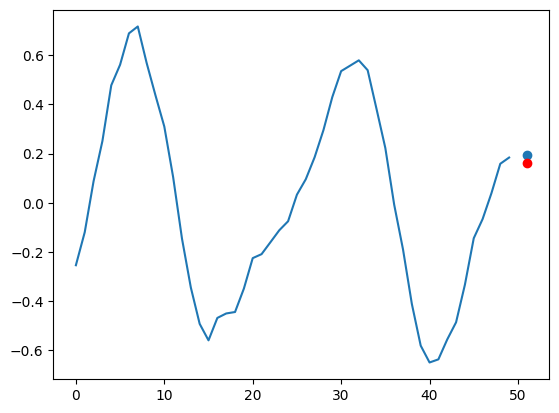

In [62]:
sample_no = 1
_, axe = plt.subplots()
axe.plot(X_test[sample_no])
axe.scatter([51], y_test[sample_no])
axe.scatter([51], pred[sample_no], c='r')